In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tucumcari
Processing Record 2 of Set 1 | invermere
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | bahir dar
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | hay river
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | san carlos de bariloche
Processing Record 12 of Set 1 | kijang
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | tete
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | laguna
Processing Record 19 of Set 1 | aksarka
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | la macarena
Processing Record 22 of Set 1 | att

City not found. Skipping...
Processing Record 41 of Set 4 | esperance
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | erdenet
Processing Record 44 of Set 4 | zhezkazgan
Processing Record 45 of Set 4 | nadvoitsy
Processing Record 46 of Set 4 | alcudia
Processing Record 47 of Set 4 | la ronge
Processing Record 48 of Set 4 | gospic
Processing Record 49 of Set 4 | makat
Processing Record 50 of Set 4 | samarai
Processing Record 1 of Set 5 | kahului
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | kavieng
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | lucea
Processing Record 6 of Set 5 | tornio
Processing Record 7 of Set 5 | vila velha
Processing Record 8 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 5 | kamen-rybolov
Processing Record 10 of Set 5 | markova
Processing Record 11 of Set 5 | iquitos
Processing Record 12 of Set 5 | vila franca do campo
Processing Record 13 of Set 5 | nouadhibo

Processing Record 32 of Set 8 | sungaipenuh
Processing Record 33 of Set 8 | kuanshan
City not found. Skipping...
Processing Record 34 of Set 8 | broken hill
Processing Record 35 of Set 8 | grand gaube
Processing Record 36 of Set 8 | laranjeiras do sul
Processing Record 37 of Set 8 | northam
Processing Record 38 of Set 8 | polson
Processing Record 39 of Set 8 | tyukalinsk
Processing Record 40 of Set 8 | mayo
Processing Record 41 of Set 8 | klyuchi
Processing Record 42 of Set 8 | muravlenko
Processing Record 43 of Set 8 | dingle
Processing Record 44 of Set 8 | opportunity
Processing Record 45 of Set 8 | gravdal
Processing Record 46 of Set 8 | mackay
Processing Record 47 of Set 8 | riverton
Processing Record 48 of Set 8 | hornepayne
Processing Record 49 of Set 8 | palizada
Processing Record 50 of Set 8 | basingstoke
Processing Record 1 of Set 9 | kukushtan
Processing Record 2 of Set 9 | beyneu
Processing Record 3 of Set 9 | belushya guba
City not found. Skipping...
Processing Record 4 of 

Processing Record 17 of Set 12 | toamasina
Processing Record 18 of Set 12 | san andres
Processing Record 19 of Set 12 | bom jesus
Processing Record 20 of Set 12 | mordovo
Processing Record 21 of Set 12 | katobu
Processing Record 22 of Set 12 | sibolga
Processing Record 23 of Set 12 | minna
Processing Record 24 of Set 12 | kroya
Processing Record 25 of Set 12 | waterloo
Processing Record 26 of Set 12 | ath
Processing Record 27 of Set 12 | astoria
Processing Record 28 of Set 12 | coquimbo
Processing Record 29 of Set 12 | mondlo
Processing Record 30 of Set 12 | kavaratti
Processing Record 31 of Set 12 | hamilton
Processing Record 32 of Set 12 | renfrew
Processing Record 33 of Set 12 | sindand
City not found. Skipping...
Processing Record 34 of Set 12 | ukiah
Processing Record 35 of Set 12 | fort nelson
Processing Record 36 of Set 12 | vila
Processing Record 37 of Set 12 | guiren
Processing Record 38 of Set 12 | aykhal
Processing Record 39 of Set 12 | saint-denis
Processing Record 40 of Se

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tucumcari,35.1717,-103.7250,33.64,55,0,10.36,US,2022-02-10 07:25:00
1,Invermere,50.5167,-116.0354,30.36,93,100,3.96,CA,2022-02-10 07:25:01
2,Dikson,73.5069,80.5464,1.53,94,100,20.38,RU,2022-02-10 07:25:01
3,Bahir Dar,11.5936,37.3908,70.59,47,86,1.72,ET,2022-02-10 07:25:02
4,Saint George,37.1041,-113.5841,55.99,37,0,21.85,US,2022-02-10 07:11:59
5,New Norfolk,-42.7826,147.0587,70.75,26,14,10.31,AU,2022-02-10 07:25:02
6,Hay River,60.8156,-115.7999,1.38,78,75,10.36,CA,2022-02-10 07:25:03
7,Avarua,-21.2078,-159.7750,78.85,89,100,5.75,CK,2022-02-10 07:25:03
8,Hobart,-42.8794,147.3294,71.11,39,75,14.97,AU,2022-02-10 07:25:04
9,San Carlos De Bariloche,-41.1456,-71.3082,53.35,47,0,8.05,AR,2022-02-10 07:20:27


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

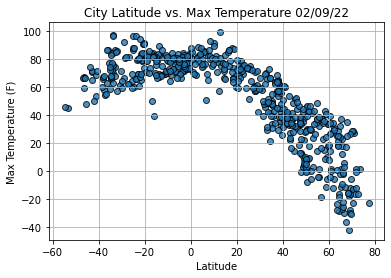

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

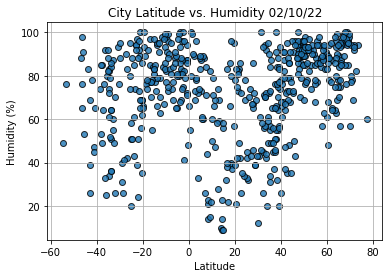

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

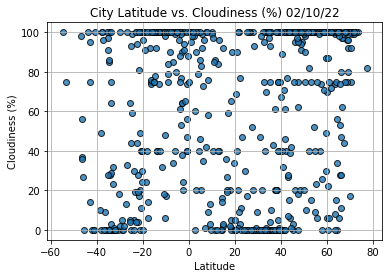

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

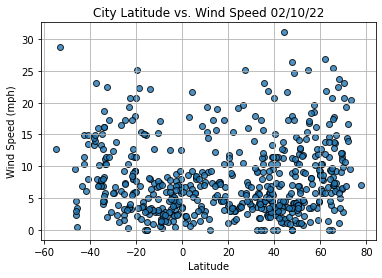

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()